In [10]:
import matplotlib.gridspec as gridspec
import scqubits
import numpy as np
from CoupledQuantumSystems.visualization import *
from CoupledQuantumSystems.systems import *
from tqdm import tqdm
import pickle
import scipy
from CoupledQuantumSystems.qobj_manip import *
from scipy.special import erfc

# linestyles = ['-',(0,(3,1,1,1)),(0,(5,2,5,2))]
# linestyles = ['-','--',':']
# import matplotlib
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
linestyles = ['-','-','--']
linewidth_list = [1.75,1.75,1]

colors = ['#4999c3','#d5373d','black']

In [2]:
def plot_sweep_Er(ax,matrix, evals,Er_list,qls = [0,1,2],ylim=(-1,1),participating_transitions = None):
    num_evals =len(evals)

    if participating_transitions != None:
        for i in range(num_evals):
                for j in range(num_evals): 
                    if (i, j) not in participating_transitions and (j, i) not in participating_transitions:
                        matrix[i, j] = 0 

    for ql  in qls:
        color  = colors[ql]
        linestyle = linestyles[ql]
        shift_from_qubit_transition = []
        for Er in tqdm(Er_list, desc = "Er loop"):
            shifts = [get_shift_accurate(matrix[ql,ql2], evals[ql2], evals[ql], Er) for ql2 in range(num_evals)] 
            shift_from_qubit_transition.append(sum(shifts))
        ax.plot(Er_list, shift_from_qubit_transition, label=rf'$\chi_{ql}$',color = color, linestyle = linestyle)

    ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    ax.set_xlim(Er_list[0],Er_list[-1])
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_xlabel(rf'$\omega_r$')
    ax.legend()

def alpha(t, Delta_rd, epsilon_r, kappa):
    return (-1j*epsilon_r / (1j*Delta_rd + kappa/2)) * (1 - np.exp(-(1j*Delta_rd + kappa/2)*t))


Er loop: 100%|██████████| 10000/10000 [00:00<00:00, 64607.17it/s]
 /tmp/ipykernel_2025037/677439097.py: 25

Text(6.7421827430479695, 0.0004, '2-11')

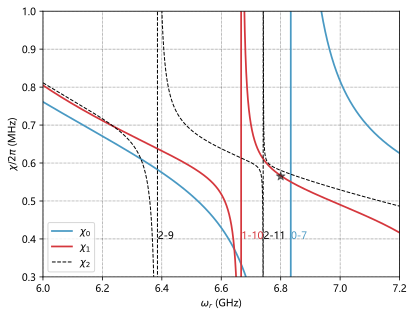

In [38]:
import matplotlib.pyplot as plt


fig,ax= plt.subplots(1,1)
n_evals = 30
qbt0 = scqubits.Fluxonium(EJ = 3,EC = 3/6,EL = 3/25, cutoff = 110,flux = 0,truncated_dim=n_evals)
matrix0 =  qbt0.matrixelement_table(operator = "n_operator",evals_count=n_evals)
evals0 = qbt0.eigenvals(n_evals)

Er_list = np.linspace(6,7.2,int(1e4))

ylim  = (0.0003,0.001) # in GHz
for ql  in [0,1,2]:
    shift_from_qubit_transition = []
    for Er in tqdm(Er_list, desc = "Er loop"):
        shifts = [get_shift_accurate(matrix0[ql,ql2], evals0[ql2], evals0[ql], Er) for ql2 in range(n_evals)] 
        shift_from_qubit_transition.append(sum(shifts)/100)
    ax.plot(Er_list,np.array(shift_from_qubit_transition), label=rf'$\chi_{ql}$',color = colors[ql], linestyle = linestyles[ql],linewidth = linewidth_list[ql])
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax.set_xlim(Er_list[0],Er_list[-1])
ax.set_ylim(ylim[0],ylim[1])
ax.set_xlabel(rf'$\omega_r$')
ax.legend(loc= 'lower left')
ax.set_xlabel(rf'$\omega_r$ (GHz)')
ax.set_yticklabels([f'{val*1000:.1f}' for val in ax.get_yticks()])
ax.set_ylabel(r'$\chi/2\pi$ (MHz)')
ax.scatter(6.8,0.000565, marker='*', color='black', s=80,alpha=0.5,zorder=10)

y_offset = 0.0004
x_offset = 0.001
ax.text(evals0[9]-evals0[2]+x_offset,y_offset,'2-9',color = colors[2])
ax.text(evals0[10]-evals0[1]+x_offset, y_offset,'1-10',color = colors[1])
ax.text(evals0[7]-evals0[0]+x_offset, y_offset,'0-7',color = colors[0])
ax.text(evals0[11]-evals0[2]+x_offset, y_offset,'2-11',color = colors[2])
# for i in [0,1,2]:
#     allowed_j = [i + 2*n for n in range(0,10) if i + 2*n < n_evals]
#     for j in allowed_j:
#         freq = evals0[j]-evals0[i]
#         if freq > Er_list[0] and freq < Er_list[-1]:
#             ax.text(freq+x_offset, y_offset,f"{i}-{j}",color = colors[i],va='center',ha='center')

In [8]:
evals0 - evals0[0]

array([ 0.        ,  2.23262699,  2.23587903,  2.94836184,  4.71432305,
        5.0193538 ,  5.62957906,  6.83385425,  7.69813736,  8.62116031,
        8.89965264,  8.97706177,  9.729226  , 10.56725625, 11.21196726,
       11.75999166, 12.43260038, 13.22143382, 14.01960738, 14.81860764,
       15.63929001, 16.48352759, 17.33503801, 18.17833867, 18.98724555,
       19.65126587, 19.9905783 , 20.29161809, 20.87275862, 21.55974321])

# Combine the plots

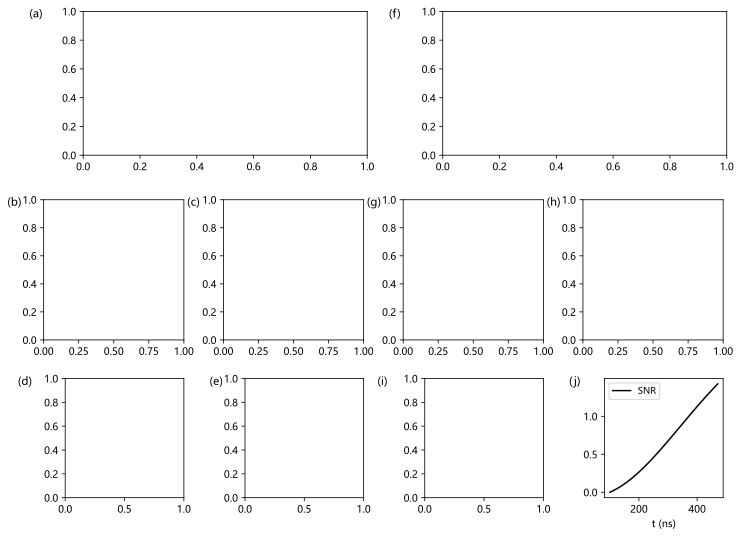

In [5]:
n_evals = 20
qls = [0,1,2]
max_ol = 50
max_ql = 20

fig = plt.figure(figsize=(10, 7.5)) 
first_row_height = 0.65
second_row_height = 1/3
first_two_column_width = 1/2
gs0 = fig.add_gridspec(nrows=1, ncols=1,left=0.1, right=0.495,bottom=first_row_height+second_row_height*0.15,top = first_row_height+second_row_height*0.95)
gs1 = fig.add_gridspec(nrows=1, ncols=1,left=0.6, right=0.995,bottom=first_row_height+second_row_height*0.15,top = first_row_height+second_row_height*0.95)
ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs1[0])

gs0_ef = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width*0.09, right=first_two_column_width*0.48,bottom=first_row_height*0.55,top = first_row_height*0.95)
gs1_ef = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width*0.59, right=first_two_column_width*0.98,bottom=first_row_height*0.55,top = first_row_height*0.95)
gs2_ef = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width*0.15, right=first_two_column_width*0.48,bottom=first_row_height*0.1,top = first_row_height*0.44)
gs3_ef = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width*0.65, right=first_two_column_width*0.98,bottom=first_row_height*0.1,top = first_row_height*0.44)
ax0_ef = fig.add_subplot(gs0_ef[0])
ax1_ef = fig.add_subplot(gs1_ef[0])
ax2_ef = fig.add_subplot(gs2_ef[0])
ax3_ef = fig.add_subplot(gs3_ef[0])

gs0_gf = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width+first_two_column_width*0.09, right=first_two_column_width+first_two_column_width*0.48,bottom=first_row_height*0.55,top = first_row_height*0.95)
gs1_gf = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width+first_two_column_width*0.59, right=first_two_column_width+first_two_column_width*0.98,bottom=first_row_height*0.55,top = first_row_height*0.95)
gs2_gf = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width+first_two_column_width*0.15, right=first_two_column_width+first_two_column_width*0.48,bottom=first_row_height*0.1,top = first_row_height*0.44)
gs3_gf = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width+first_two_column_width*0.65, right=first_two_column_width+first_two_column_width*0.98,bottom=first_row_height*0.1,top = first_row_height*0.44)
ax0_gf = fig.add_subplot(gs0_gf[0])
ax1_gf = fig.add_subplot(gs1_gf[0])
ax2_gf = fig.add_subplot(gs2_gf[0])
ax3_gf = fig.add_subplot(gs3_gf[0])

plt.text(-0.19, 1.02, '(a)', transform=plt.subplot(gs0[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.19, 1.02, '(f)', transform=plt.subplot(gs1[0]).transAxes, fontsize=11, va='top', color='black')

plt.text(-0.26, 1.02, '(b)', transform=plt.subplot(gs0_ef[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.26, 1.02, '(c)', transform=plt.subplot(gs1_ef[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.4, 1.02, '(d)', transform=plt.subplot(gs2_ef[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.3, 1.02, '(e)', transform=plt.subplot(gs3_ef[0]).transAxes, fontsize=11, va='top', color='black')

plt.text(-0.26, 1.02, '(g)', transform=plt.subplot(gs0_gf[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.26, 1.02, '(h)', transform=plt.subplot(gs1_gf[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.4, 1.02, '(i)', transform=plt.subplot(gs2_gf[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.3, 1.02, '(j)', transform=plt.subplot(gs3_gf[0]).transAxes, fontsize=11, va='top', color='black')

def plot_sweep_er_ef(ax):
    qbt0 = scqubits.Fluxonium(EJ = 3,EC = 3/6,EL = 3/25, cutoff = 110,flux = 0,truncated_dim=n_evals)
    matrix0 =  qbt0.matrixelement_table(operator = "n_operator",evals_count=n_evals)
    evals0 = qbt0.eigenvals(n_evals)
    Er_list0 = np.linspace(6.2,7.0,int(1e4))
    ylim  = (0.0003,0.001)
    for ql  in qls:
        shift_from_qubit_transition = []
        for Er in tqdm(Er_list0, desc = "Er loop"):
            shifts = [get_shift_accurate(matrix0[ql,ql2], evals0[ql2], evals0[ql], Er) for ql2 in range(n_evals)] 
            shift_from_qubit_transition.append(sum(shifts)/100)
        ax.plot(Er_list0,np.array(shift_from_qubit_transition), label=rf'$\chi_{ql}$',color = colors[ql], linestyle = linestyles[ql],linewidth = linewidth_list[ql])
    ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
    ax.set_xlim(Er_list0[0],Er_list0[-1])
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_xlabel(rf'$\omega_r$')
    ax.legend(loc= 'lower left')
    ax.set_xlabel(rf'$\omega_r$ (GHz)')
    ax.set_yticklabels([f'{val*1000:.1f}' for val in ax.get_yticks()])
    ax.set_ylabel(r'$\chi/2\pi$ (MHz)')
    ax.scatter(6.8,0.000565, marker='*', color='black', s=80,alpha=0.5,zorder=10)

    y_offset = 0.0004
    x_offset = 0.01
    ax.text(evals0[9]-evals0[2]+x_offset,y_offset,'2-9',color = colors[2])
    ax.text(evals0[10]-evals0[1]+x_offset, y_offset,'1-10',color = colors[1])
    ax.text(evals0[7]-evals0[0]+x_offset, y_offset,'0-7',color = colors[0])
    ax.text(evals0[11]-evals0[2]+x_offset, y_offset,'2-11',color = colors[2])
# plot_sweep_er_ef(ax0)

def plot_sweep_er_gf(ax):
    EJ_over_EC = 2.7
    EJ_over_EL = 45
    qbt1 = scqubits.Fluxonium(EJ = 4,EC = 4/EJ_over_EC,EL = 4/EJ_over_EL, cutoff = 110,flux = 0,truncated_dim=n_evals)
    evals1 = qbt1.eigenvals(n_evals)
    matrix1 =  qbt1.matrixelement_table(operator = "n_operator",evals_count=n_evals)
    Er_list1 = np.linspace(9,12,int(1e4))
    ylim  = (-0.0005,0.001)
    for ql  in qls:
        shift_from_qubit_transition = []
        for Er in tqdm(Er_list1, desc = "Er loop"):
            shifts = [get_shift_accurate(matrix1[ql,ql2], evals1[ql2], evals1[ql], Er) for ql2 in range(n_evals)] 
            shift_from_qubit_transition.append(sum(shifts)/100)
        ax.plot(Er_list1, np.array(shift_from_qubit_transition), label=rf'$\chi_{ql}$',color = colors[ql], linestyle = linestyles[ql],linewidth = linewidth_list[ql])

    ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
    ax.set_xlim(Er_list1[0],Er_list1[-1])
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_xlabel(rf'$\omega_r$')
    ax.legend(loc= 'lower left')
    ax.set_xlabel(rf'$\omega_r$ (GHz)')
    ax.set_yticklabels([f'{val*1000:.1f}' for val in ax.get_yticks()])
    ax.set_ylabel(r'$\chi/2\pi$ (MHz)')
    ax.scatter(10.38695526,0.0002, marker='*', color='black', s=80,alpha=0.5,zorder=10)
    y_offset = -0.0003
    x_offset = 0.006
    ax.text((evals1[9]-evals1[2]+x_offset),  y_offset,'2-9',color = colors[2])
    ax.text((evals1[10]-evals1[1]+x_offset), y_offset,'1-10',color = colors[1])
    ax.text((evals1[9]-evals1[0]+x_offset), y_offset,'0-9',color = colors[0])
    ax.text((evals1[11]-evals1[2]+x_offset), y_offset,'2-11',color = colors[2])
# plot_sweep_er_gf(ax1)

def plot_ef_alpha(ax):
    with open('../ef_new/ef_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    epsilon_r = 0.003 *2*np.pi # External driving term
    kappa = 1e-3 # Decay rate of the resonator
    tot_time =650
    tlist = np.linspace(0, tot_time, tot_time)
    last_t_idx = 632
    frequency_used = -1*(system.evals[system.product_to_dressed[(0,1)]]-system.evals[system.product_to_dressed[(0,0)]])
    with open('../ef_new/averaged.pkl', 'rb') as f:
        results = pickle.load(f)
    alpha_arr = (np.sqrt(2)*results[0].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist) )[:last_t_idx+1]
    ax.plot(alpha_arr.real,alpha_arr.imag, color='#4999c3',label = rf'$\alpha_{{\left|0\right>}}$ sim',alpha=1)
    alpha_arr = (np.sqrt(2)*results[1].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist) )[:last_t_idx+1]
    ax.plot(alpha_arr.real,alpha_arr.imag, color='#d5373d',label = rf'$\alpha_{{\left|1\right>}}$ sim',alpha=1)

    Delta_rd = 0  # Detuning of the readout resonator
    alpha_t_values = (1/np.sqrt(2)*alpha(tlist, Delta_rd, epsilon_r, kappa) )[:last_t_idx+1]
    ax.plot(-alpha_t_values.real, alpha_t_values.imag ,color='lightblue',linestyle='--',lw=2,label=rf'$\alpha_{{\left|0\right>}}$ semi-c')

    Delta_rd = 2*np.pi*((system.evals[system.product_to_dressed[(0,1)]]-system.evals[system.product_to_dressed[(0,0)]]) -\
                        (system.evals[system.product_to_dressed[(1,1)]]-system.evals[system.product_to_dressed[(1,0)]]))  # Detuning of the readout resonator
    alpha_t_values =  (1/np.sqrt(2)*alpha(tlist, Delta_rd, epsilon_r, kappa) )[:last_t_idx+1]
    ax.plot(-alpha_t_values.real , alpha_t_values.imag, color='pink',linestyle='--',lw=2,label=rf'$\alpha_{{\left|1\right>}}$ semi-c')

    ax.set_aspect('equal')
    ax.set_xlabel(rf'Re[$\alpha$]')
    ax.set_ylabel(rf'Im[$\alpha$]', labelpad=-6)
    ax.legend(loc = 'upper left',prop={'size': 9})
    ax.set_xlim(-9,1.5)
    ax.set_ylim(-9,1.5)
    ax.set_yticks([0,-4,-8])
# plot_ef_alpha(ax0_ef)

def plot_gf_alpha(ax):
    with open('../gf_detection/gf_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    epsilon_r = 0.005*2*np.pi  # External driving term
    kappa = 1e-3 # Decay rate of the resonator
    tot_time =500
    tlist = np.linspace(0, tot_time, tot_time)[::5]
    last_t_idx = 94
    frequency_used = -1*(system.evals[system.product_to_dressed[(1,1)]]-system.evals[system.product_to_dressed[(1,0)]])
    with open('../gf_detection/averaged.pkl', 'rb') as f:
        results = pickle.load(f)
    alpha_arr = (np.sqrt(2)*results[1].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist)  )[:last_t_idx+1]
    ax.plot(alpha_arr.real,alpha_arr.imag,color="#4999c3",label = rf'$\alpha_{{\left|0\right>}}$ sim',alpha=1)
    alpha_arr = (np.sqrt(2)*results[0].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist) )[:last_t_idx+1]
    ax.plot(alpha_arr.real,alpha_arr.imag,color="#d5373d",label = rf'$\alpha_{{\left|1\right>}}$ sim',alpha=1)

    Delta_rd = 2*np.pi*((system.evals[system.product_to_dressed[(1,1)]]-system.evals[system.product_to_dressed[(1,0)]]) -\
                        (system.evals[system.product_to_dressed[(0,1)]]-system.evals[system.product_to_dressed[(0,0)]]))  # Detuning of the readout resonator
    alpha_t_values =( 1/np.sqrt(2)*alpha(tlist, Delta_rd, epsilon_r, kappa) )[:last_t_idx+1]
    ax.plot(-alpha_t_values.real , alpha_t_values.imag, color='lightblue',linestyle=(1,(2,2,2,2)),lw=2,label=rf'$\alpha_{{\left|0\right>}}$ semi-c')

    Delta_rd = 0  # Detuning of the readout resonator
    alpha_t_values = (1/np.sqrt(2)*alpha(tlist, Delta_rd, epsilon_r, kappa) )[:last_t_idx+1]
    ax.plot(-alpha_t_values.real, alpha_t_values.imag, color='pink',linestyle='--',lw=2,label=rf'$\alpha_{{\left|1\right>}}$ semi-c')


    ax.set_aspect('equal')
    ax.set_xlabel(rf'Re[$\alpha$]')
    ax.set_ylabel(rf'Im[$\alpha$]', labelpad=-6)
    ax.legend(loc = 'lower right',prop={'size': 9})
    ax.set_xlim(-1.5,12.0)
    ax.set_ylim(-12,1.5)
    ax.set_yticks([0,-5,-10])
# plot_gf_alpha(ax0_gf)

def plot_ef_non_linearity(ax):
    with open('../ef_new/ef_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    energies=  system.hilbertspace.eigenvals(system.qbt.truncated_dim * system.osc.truncated_dim)
    def dressed_ener(ql,ol):
        return energies[system.product_to_dressed[(ql,ol)]]
    n_osc_lvls =70
    dressed_osc_frequencies = [[] for _ in range(3)]
    for j in [0,1,2]:
        for i in range(0,system.osc.truncated_dim-1):
            dressed_osc_frequencies[j].append(dressed_ener(j,i+1)-dressed_ener(j,i))   
    for j in [0,1,2]:
        ax.plot(list(range(system.osc.truncated_dim-1))[:n_osc_lvls], dressed_osc_frequencies[j][:n_osc_lvls],label=rf'$\omega_{{{j},n+1}} - \omega_{{{j},n}}$',color = colors[j], linestyle = linestyles[j],linewidth = linewidth_list[j])
    ax.set_xticks(list(range(n_osc_lvls))[::10])
    ax.set_xlim(0,65)
    ax.set_ylim( 6.797,6.801)
    ax.legend(loc = 'lower right',prop={'size': 9})
    ax.set_ylabel(rf'$\omega_r$ $(GHz/2\pi)$')
    ax.set_xlabel(r'$n_p$')
# plot_ef_non_linearity(ax2_ef)

def plot_gf_non_linearity(ax):
    with open('../gf_detection/gf_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    energies=  system.hilbertspace.eigenvals(system.qbt.truncated_dim * system.osc.truncated_dim)
    def dressed_ener(ql,ol):
        return energies[system.product_to_dressed[(ql,ol)]]
    n_osc_lvls =70
    dressed_osc_frequencies = [[] for _ in range(3)]
    for j in [0,1,2]:
        for i in range(0,system.osc.truncated_dim-1):
            dressed_osc_frequencies[j].append(dressed_ener(j,i+1)-dressed_ener(j,i))   
    for j in [0,1,2]:
        ax.plot(list(range(system.osc.truncated_dim-1))[:n_osc_lvls], dressed_osc_frequencies[j][:n_osc_lvls],label=rf'$\omega_{{{j},n+1}} - \omega_{{{j},n}}$',color = colors[j], linestyle = linestyles[j],linewidth = linewidth_list[j])
    ax.set_xticks(list(range(n_osc_lvls))[::10])
    ax.set_ylim(10.387,10.391)
    ax.set_xlim(0,65)
    ax.legend(loc = 'upper right',prop={'size': 9})
    ax.set_ylabel(rf'$\omega_r$ $(GHz/2\pi)$')
    ax.set_xlabel(r'$n_p$')
# plot_gf_non_linearity(ax2_gf)

def plot_ef_pn(ax):
    with open('../ef_new/mcsolve_results_with_product_basis.pkl', 'rb') as f:
        results = pickle.load(f)
    tot_time =650
    tlist = np.linspace(0, tot_time, tot_time)
    last_t_idx = 632
    for ql, result in zip([0,1,2],results[:3]):
        ax.plot(tlist[:last_t_idx+1],result.expect[1][:last_t_idx+1],color=colors[ql],label = rf'$\left|{ql}\right>$',alpha=0.5)
    ax.legend()
    ax.set_xlabel(rf't (ns)')
    ax.set_ylabel(rf'$\langle \alpha^\dagger \alpha \rangle$')
    ax.legend(loc = 'upper left',prop={'size': 9})
# plot_ef_pn(ax1_ef)

def plot_gf_pn(ax):
    with open('../gf_detection/mcsolve_results_with_product_basis.pkl', 'rb') as f:
        results = pickle.load(f)
    tot_time =500
    tlist = np.linspace(0, tot_time, tot_time)[::5]
    last_t_idx = 94
    for ql, result in zip([1,0,2],results[:3]):
        ax.plot(tlist[:last_t_idx+1],result.expect[1][:last_t_idx+1],color=colors[ql],label = rf'$\left|{ql}\right>$',alpha=0.5)
    ax.legend()

    ax.set_xlabel(rf't (ns)')
    ax.set_ylabel(rf'$\langle \alpha^\dagger \alpha \rangle$')
    ax.legend(loc = 'upper left',prop={'size': 9})
# plot_gf_pn(ax1_gf)

def plot_ef_SNR(ax):
    with open('../ef_new/ef_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    kappa = 1e-3
    # efficiency = 1/4
    efficiency = 1
    tot_time =650
    tlist = np.linspace(0, tot_time, tot_time)
    last_t_idx = 632
    frequency_used = -1* 6.799035540829148
    with open('../ef_new/averaged.pkl', 'rb') as f:
        results = pickle.load(f)
    alpha_arr_0 = np.sqrt(kappa)*(np.sqrt(2)*results[0].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist)  )[:last_t_idx+1] 
    alpha_arr_1 = np.sqrt(kappa)*(np.sqrt(2)*results[1].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist) )[:last_t_idx+1] 
    diff_arr = np.abs(alpha_arr_0-alpha_arr_1)
    numerator = np.sqrt(kappa * efficiency) * scipy.integrate.cumulative_trapezoid(diff_arr, tlist[:last_t_idx+1],initial=0)
    denominator =np.sqrt(kappa *  tlist[:last_t_idx+1] / 2 * 2)
    denominator[0]+= 1e-10 # avoid dividing by zero
    SNR = numerator / denominator
    ax.plot(tlist[:last_t_idx+1],SNR,color='black',label='SNR')
    ax.legend(loc = 'upper left',prop={'size': 9})
    ax.set_xlabel(rf't (ns)')
# plot_ef_SNR(ax3_ef)

def plot_gf_SNR(ax):
    with open('../gf_detection/gf_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    kappa = 1e-3
    # efficiency = 1/4
    efficiency = 1
    tot_time =500
    tlist = np.linspace(0, tot_time, tot_time)[::5]
    first_t_idx = 20
    last_t_idx = 94
    frequency_used = -1*(system.evals[system.product_to_dressed[(1,1)]]-system.evals[system.product_to_dressed[(1,0)]])
    with open('../gf_detection/averaged.pkl', 'rb') as f:
        results = pickle.load(f)
    alpha_arr_0 = np.sqrt(kappa)*(np.sqrt(2)*results[1].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist)  )[first_t_idx:last_t_idx+1] 
    alpha_arr_1 = np.sqrt(kappa)*(np.sqrt(2)*results[0].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist) )[first_t_idx:last_t_idx+1]
    diff_arr = np.abs(alpha_arr_0-alpha_arr_1)
    # numerator = np.sqrt( efficiency) * scipy.integrate.cumulative_trapezoid(diff_arr, tlist[first_t_idx:last_t_idx+1],initial=0)
    numerator = np.sqrt(kappa * efficiency) * scipy.integrate.cumulative_trapezoid(diff_arr, tlist[first_t_idx:last_t_idx+1],initial=0)
    denominator =np.sqrt(kappa *  tlist[first_t_idx:last_t_idx+1] / 2 * 2)
    denominator[0]+= 1e-10 # avoid dividing by zero
    SNR = numerator / denominator
    ax.plot(tlist[first_t_idx:last_t_idx+1],SNR,color='black',label='SNR')
    ax.legend(loc = 'upper left',prop={'size': 9})
    ax.set_xlabel(rf't (ns)')
plot_gf_SNR(ax3_gf)

# plt.savefig("photon_number_SNR_new_ef.pdf", transparent=True, bbox_inches='tight')